Попробуйте обучить модель с другим значением k. Визуализируйте области классификации и сравните эффективности модели.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


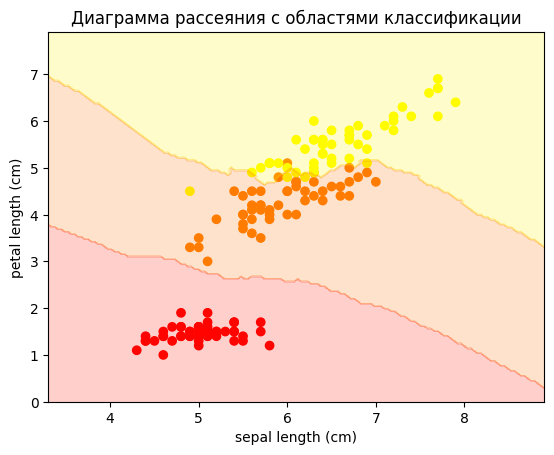

Точность модели kNN (n_neighbors=4) с использованием кросс-валидации: 0.9400000000000001


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler

iris = load_iris()
features = iris.data

data = pd.DataFrame(features, columns = iris.feature_names)
X = data.iloc[:, [0, 2]]
y = iris.target


scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_scaled, y)

X0 = np.linspace(X.iloc[:, 0].min()-1,X.iloc[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X.iloc[:, 1].min()-1,X.iloc[:, 1].max()+1, X.shape[0])

X0_grid, X1_grid = np.meshgrid(X0, X1)

XX = np.array([X0_grid.ravel(), X1_grid.ravel()]).T

XX_scaled = scaler.transform(XX)
Z = knn.predict(XX_scaled).reshape(X0_grid.shape)

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='autumn')
plt.contourf(X0_grid, X1_grid, Z, cmap='autumn', alpha=0.2)

plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.title("Диаграмма рассеяния с областями классификации")
plt.show()

# Оценка с помощью кросс-валидации
accuracy_score = cross_val_score(knn, X_scaled, y, cv=5)
print("Точность модели kNN (n_neighbors=4) с использованием кросс-валидации:", np.mean(accuracy_score))


Подвигайте новое наблюдение в последнем пункте методических указаний. Сдвиньте его за пределы области определения выборки. Как меняется нормализованное значение?

In [ ]:
new_observation = pd.DataFrame([[100, 200]])


new_observation_scaled = scaler.transform(new_observation)

print("Новое наблюдение (нормализованное):", new_observation_scaled)

Новое наблюдение (нормализованное): [[26.58333333 33.72881356]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


уменьшается

Поэкспериментируйте с разными метриками расстояния. Визуализируйте ближайших соседей нового объекта при разных метриках расстояния.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


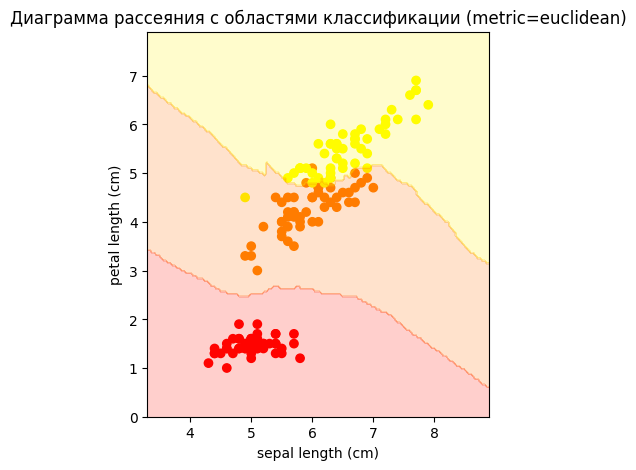

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


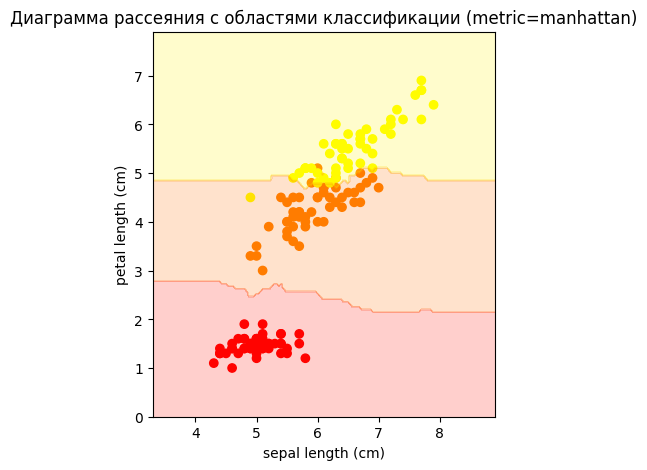

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


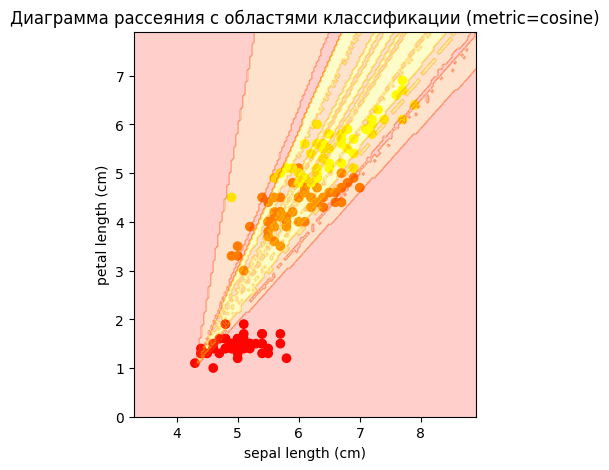

In [ ]:
metrics = ['euclidean', 'manhattan', 'cosine']

for i in range(3):
    knn = KNeighborsClassifier(n_neighbors=5, metric=metrics[i])
    knn.fit(X_scaled, y)
    plt.figure(figsize=(15, 5))
    # Визуализация областей классификации
    plt.subplot(1, 3, i+1)

    X0 = np.linspace(X.iloc[:, 0].min()-1,X.iloc[:, 0].max()+1, X.shape[0])
    X1 = np.linspace(X.iloc[:, 1].min()-1,X.iloc[:, 1].max()+1, X.shape[0])

    X0_grid, X1_grid = np.meshgrid(X0, X1)

    XX = np.array([X0_grid.ravel(), X1_grid.ravel()]).T

    XX_scaled = scaler.transform(XX)
    Z = knn.predict(XX_scaled).reshape(X0_grid.shape)

    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='autumn')
    plt.contourf(X0_grid, X1_grid, Z, cmap='autumn', alpha=0.2)

    plt.xlabel('sepal length (cm)')
    plt.ylabel('petal length (cm)')
    plt.title(f"Диаграмма рассеяния с областями классификации (metric={metrics[i]})")
    plt.show()

Обучите модель на полном датасете. Сравните ее эффективность с описанной в методических указаниях. Попробуйте разные значения k.

In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler

iris = load_iris()
X = iris.data
y = iris.target
k_values = [1, 3, 5, 7, 9, 12]
for i in k_values:
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X, y)
  y_pred = knn.predict(X)
  accuracy = accuracy_score(y, y_pred)
  print(f"accuracy_score от {i} = {accuracy}")

accuracy_score от 1 = 1.0
accuracy_score от 3 = 0.96
accuracy_score от 5 = 0.9666666666666667
accuracy_score от 7 = 0.9733333333333334
accuracy_score от 9 = 0.98
accuracy_score от 12 = 0.98


In [ ]:
from sklearn.metrics import accuracy_score


iris = load_iris()
X = iris.data
y = iris.target

# с равномерным взвешиванием
knn_uniform = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn_uniform.fit(X, y)
y_pred_uniform = knn_uniform.predict(X)
accuracy_uniform = accuracy_score(y, y_pred_uniform)

# с взвешенным взвешиванием по расстоянию
knn_distance = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn_distance.fit(X, y)
y_pred_distance = knn_distance.predict(X)
accuracy_distance = accuracy_score(y, y_pred_distance)


print("с равномерным взвешиванием:", accuracy_uniform)
print("с взвешенным взвешиванием по расстоянию:", accuracy_distance)


с равномерным взвешиванием: 0.9666666666666667
с взвешенным взвешиванием по расстоянию: 1.0


точность модели с k=1: 1.0
точность модели с k=3: 0.96
точность модели с k=5: 0.9666666666666667
точность модели с k=7: 0.9733333333333334
точность модели с k=9: 0.98


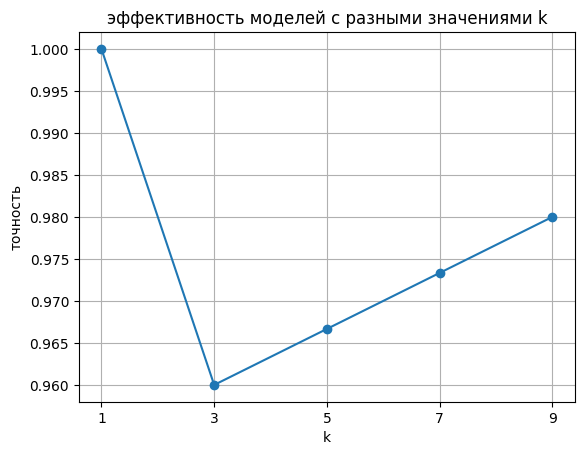

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


iris = load_iris()
X = iris.data
y = iris.target

k_values = [1, 3, 5, 7, 9]
accur_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    y_pred = knn.predict(X)
    accur = accuracy_score(y, y_pred)
    accur_scores.append(accur)
    print(f"точность модели с k={k}: {accur}")


plt.plot(k_values, accur_scores, marker='o')
plt.title('эффективность моделей с разными значениями k')
plt.xlabel('k')
plt.ylabel('точность')
plt.xticks(k_values)
plt.grid(True)
plt.show()


In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

data = fetch_california_housing()
X = data.data
y = data.target

knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X, y)

y_pred = knn_reg.predict(X)

mse = mean_squared_error(y, y_pred)
print("Среднеквадратическая ошибка:", mse)


Среднеквадратическая ошибка: 0.7042321942059601
